# Tentando entender convolução circular para DFT

Idealmente, quando pensamos em uma convolução de sinais de tempo discreto, podemos pensar na multiplicação da DTFT dos sinais. Entretanto, computacionalmente nós só podemos fazer a DFT de sinais. Como fazer a convolução de sinais usando convolução circular e quais outros cuidados devo tomar?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

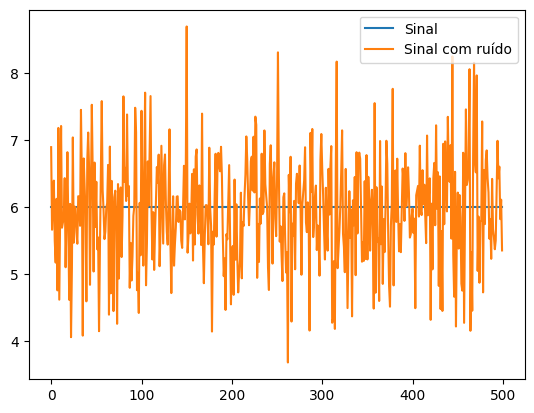

In [45]:
N = 500
n = np.linspace(0, N-1, N)

sinal = 6*np.ones(N)
# sinal = np.sin(2 * np.pi * n * 1.5 / 5)
# sinal = np.sin(np.linspace(0, 2*np.pi, N))
ruido = np.random.normal(0, 0.8, N)
sinal_ruido = sinal + ruido


plt.plot(sinal, label='Sinal')
plt.plot(sinal_ruido, label='Sinal com ruído')
plt.legend()

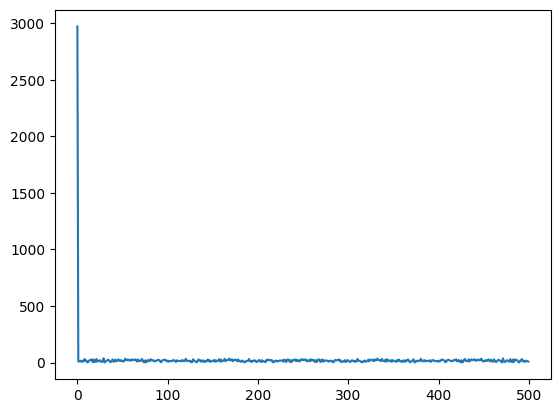

In [46]:
plt.plot(np.abs(np.fft.fft(sinal_ruido)), label='FFT do sinal')

<StemContainer object of 3 artists>

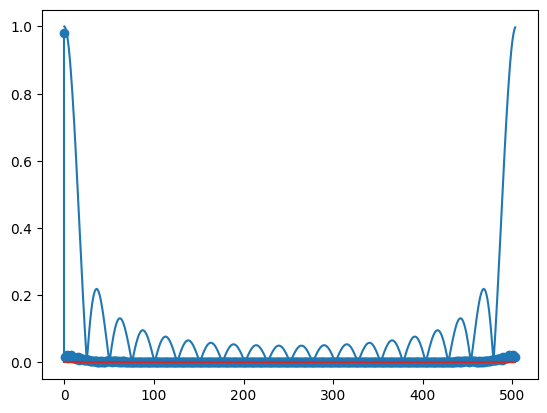

In [56]:
filtro = np.ones(20)/20
sinal_filtrado = np.convolve(sinal_ruido, filtro, mode='same')

plt.plot(np.abs(np.fft.fft(filtro, N + 5 - 1)))
plt.stem(np.abs(np.fft.fft(sinal_filtrado, N + 5 - 1))/3000)

# plt.plot(sinal_filtrado, label='Sinal filtrado')

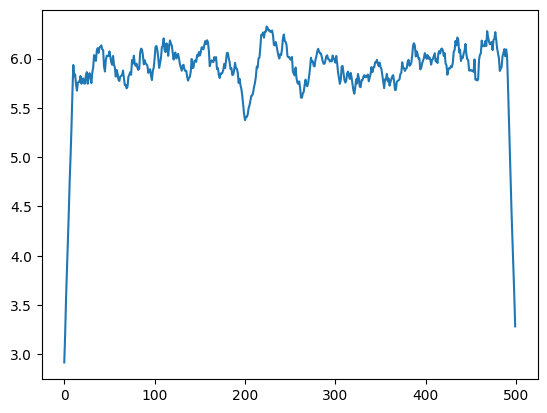

In [60]:
plt.plot(sinal_filtrado)

<StemContainer object of 3 artists>

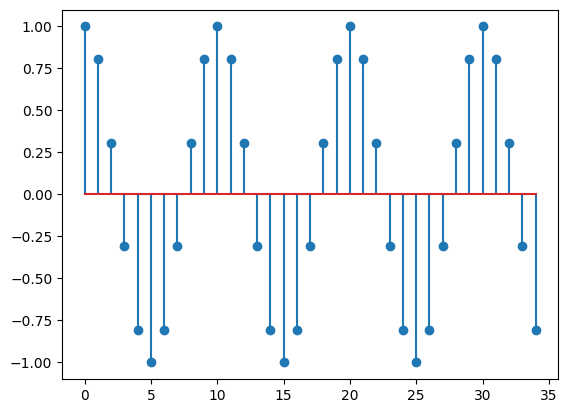

In [75]:
n = np.linspace(0, 34, 35)
sinal = np.cos(2 * np.pi * n / 10)

plt.stem(sinal)


<StemContainer object of 3 artists>

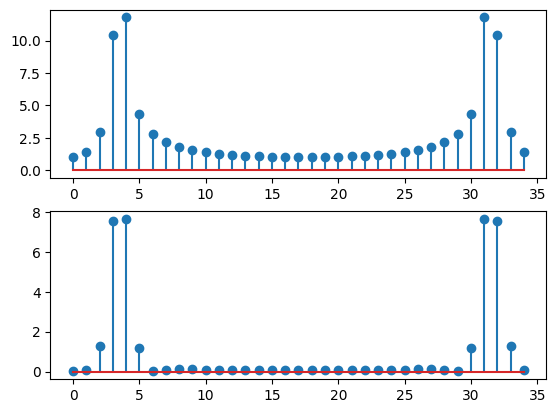

In [76]:
plt.subplot(211)
plt.stem(np.abs(np.fft.fft(sinal)))

plt.subplot(212)
plt.stem(np.abs(np.fft.fft(sinal * np.hamming(len(sinal)))))

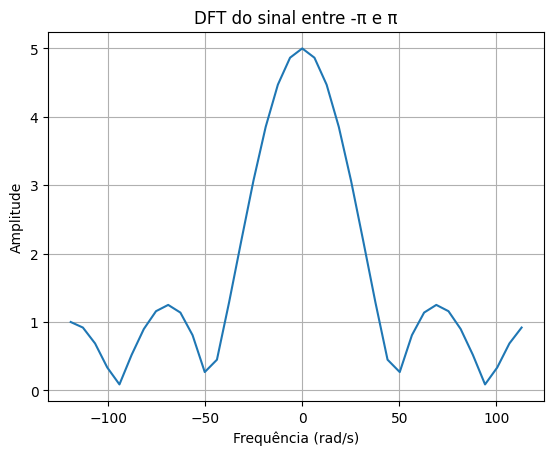

In [83]:
# Calcula a DFT do sinal
dft_sinal = np.fft.fft(np.ones(5), 34 + 5 -1)

x = 34 + 5 - 1
# Cria um vetor de frequências normalizadas entre -π e π
frequencias = np.fft.fftfreq(x, d=1/x)
frequencias = np.fft.fftshift(frequencias) * 2 * np.pi

# Desloca a DFT para que o zero esteja no centro
dft_sinal_shifted = np.fft.fftshift(dft_sinal)

# Plota a magnitude da DFT
plt.plot(frequencias, np.abs(dft_sinal_shifted))
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Amplitude')
plt.title('DFT do sinal entre -π e π')
plt.grid(True)
plt.show()

In [88]:
income_values = [5000, 6000, 7000, 8000, 10000, 12000, 15000]

for income in income_values:
    print(f'{income}: {((income * 0.275 - 896)/income * 100):.2f} % = R${(income * 0.275 - 896):.2f} ')


5000: 9.58 % = R$479.00 
6000: 12.57 % = R$754.00 
7000: 14.70 % = R$1029.00 
8000: 16.30 % = R$1304.00 
10000: 18.54 % = R$1854.00 
12000: 20.03 % = R$2404.00 
15000: 21.53 % = R$3229.00 


In [92]:
print((15000 - 896)/(1 - 0.275))

19453.793103448275


In [109]:
def juros_compostos(P, i, n):
    return P * ((1 + i)**n - 1)/i

# print((1.01)**120)
print(juros_compostos(9000, 0.01, 96))


1439345.633003447
